In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [50]:
stock = 'BTC-USD'

data = yf.download(stock)

[*********************100%%**********************]  1 of 1 completed



In [51]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2024-06-12,67321.375000,69977.890625,66902.453125,68241.187500,68241.187500,34497940694
2024-06-13,68243.101562,68365.781250,66304.562500,66756.398438,66756.398438,28955204146
2024-06-14,66747.570312,67294.648438,65056.894531,66011.093750,66011.093750,27403884779


In [52]:
data.reset_index(inplace=True)

In [53]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
3556,2024-06-12,67321.375000,69977.890625,66902.453125,68241.187500,68241.187500,34497940694
3557,2024-06-13,68243.101562,68365.781250,66304.562500,66756.398438,66756.398438,28955204146
3558,2024-06-14,66747.570312,67294.648438,65056.894531,66011.093750,66011.093750,27403884779
3559,2024-06-15,66006.742188,66402.187500,65871.773438,66191.000000,66191.000000,14121265576


In [54]:
ma_100_days = data.Close.rolling(window=100).mean() 

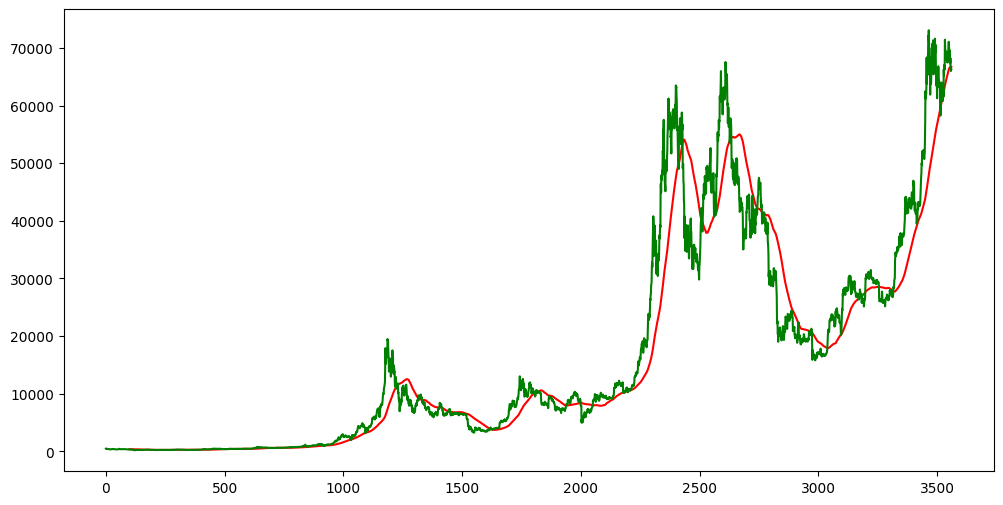

In [55]:
plt.figure(figsize=(12,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show()

In [56]:
ma_200_days = data.Close.rolling(window=200).mean()

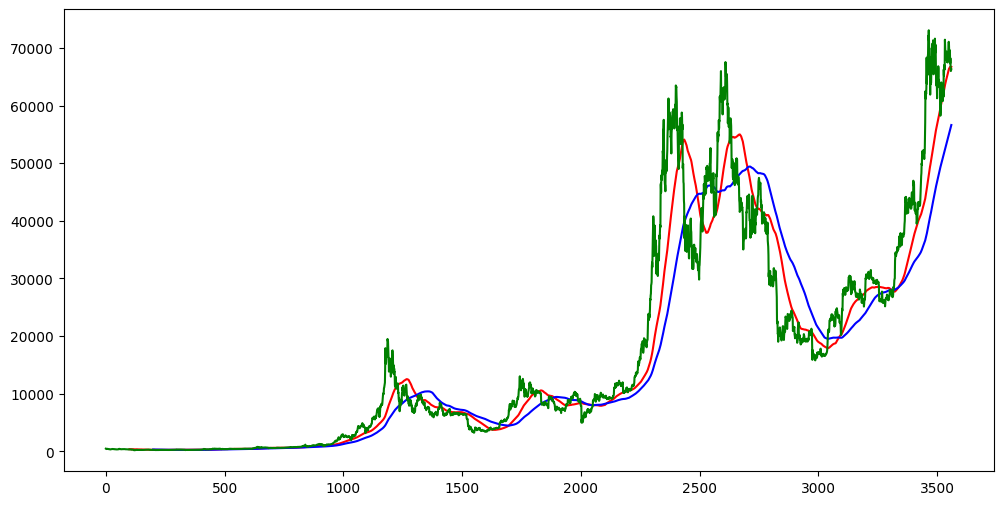

In [57]:
plt.figure(figsize=(12,6))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [58]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): int(len(data))])

In [59]:
data_train.shape[0], data_test.shape[0]

(2848, 713)

In [60]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [61]:
data_train_scaled = scaler.fit_transform(data_train)


In [62]:
x = []
y = []

for i in range(100, data_train_scaled.shape[0]):
    x.append(data_train_scaled[i-100:i])
    y.append(data_train_scaled[i,0])    

In [63]:
x, y = np.array(x), np.array(y)

In [64]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [65]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=((x.shape[1],1))))
model.add(Dropout(0.2))
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))


/Users/oattao/Desktop/learn_trad/learntrad/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [66]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [67]:
model.fit(x, y, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 39s 366ms/step - loss: 0.0309
Epoch 2/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 27s 318ms/step - loss: 0.0050
Epoch 3/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 28s 324ms/step - loss: 0.0048
Epoch 4/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 235ms/step - loss: 0.0042
Epoch 5/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 19s 217ms/step - loss: 0.0037
Epoch 6/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 19s 223ms/step - loss: 0.0041
Epoch 7/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 233ms/step - loss: 0.0043
Epoch 8/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 231ms/step - loss: 0.0034
Epoch 9/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 206ms/step - loss: 0.0034
Epoch 10/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 200ms/step - loss: 0.0032
Epoch 11/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 207ms/step - loss: 0.0025
Epoch 12/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 214ms/step - loss: 0.0028
Epoch 13/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 213ms/step - loss: 0.0030
Epoch 14/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 210ms/step - loss: 0.0030
Epoch 15/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 

In [68]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [69]:
pas_100_days = data_train.tail(100)

In [70]:
data_test = pd.concat((pas_100_days, data_test), ignore_index=True)

In [72]:
data_test_scaled = scaler.transform(data_test)

In [75]:
x = []
y = []
for i in range(100, data_test_scaled.shape[0]):
    x.append(data_test_scaled[i-100:i])
    y.append(data_test_scaled[i,0])
x, y = np.array(x), np.array(y)

In [76]:
y_predict = model.predict(x)

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step


In [80]:
scale = 1/scaler.scale_

In [81]:
y_predict = y_predict*scale

In [82]:
y = y*scale

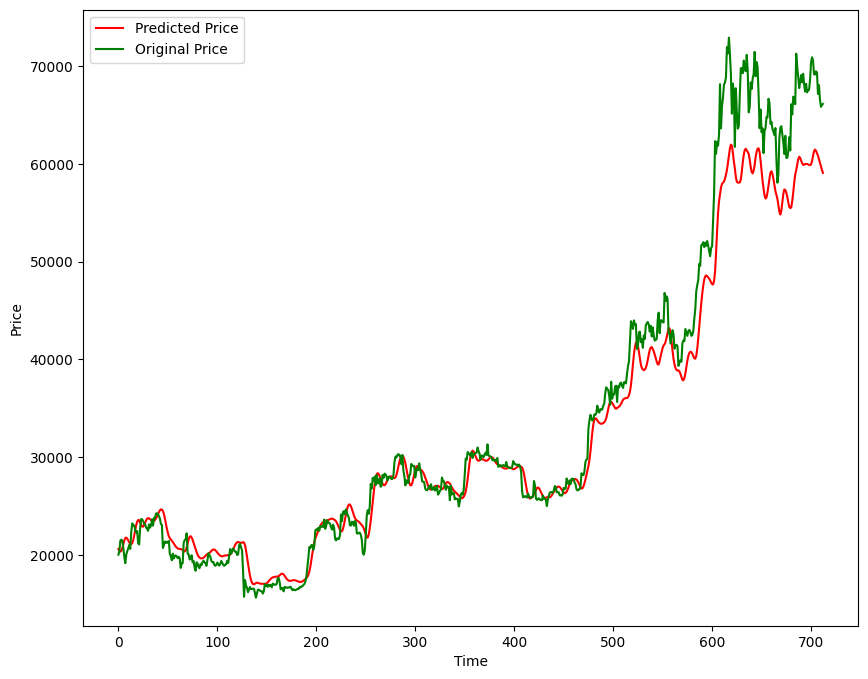

In [83]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, color='r', label='Predicted Price')
plt.plot(y, color='g', label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [84]:
model.save('Stock Predictions Model.keras')